# MNIST dataset


# Stochastic Gradient Descent

In [1]:
import warnings
warnings.filterwarnings("ignore")

import h5py
import numpy as np
import sys
sys.path.append("../")
import hamiltonian.utils as utils

data_path = '../data/'

mnist_train=h5py.File(data_path+'mnist_train.h5','r')
X_train=mnist_train['X_train'][:].reshape((-1,28*28))
X_train=X_train/255.
y_train=mnist_train['y_train']

mnist_test=h5py.File(data_path+'mnist_test.h5','r')
X_test=mnist_test['X_test'][:].reshape((-1,28*28))
X_test=X_test/255.
y_test=mnist_test['y_test']

classes=np.unique(y_train)
D=X_train.shape[1]
K=len(classes)
y_train=utils.one_hot(y_train[:],K)
y_test=utils.one_hot(y_test[:],K)

In [2]:
import time
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


import hamiltonian.softmax as softmax

eta=1e-5
epochs=50
batch_size=1000
alpha=1./100.

start_time=time.time()
start_p={'weights':np.zeros((D,K)),
        'bias':np.zeros((K))}
hyper_p={'alpha':alpha}

par,loss=softmax.sgd(X_train,y_train,K,start_p,hyper_p,eta=eta,epochs=epochs,batch_size=batch_size,verbose=0)
elapsed_time=time.time()-start_time 

print('elapsed time : {0:.4f}'.format(elapsed_time))
y_pred=softmax.predict(X_test,par)

print(classification_report(y_test[:].argmax(axis=1), y_pred))
print(confusion_matrix(y_test[:].argmax(axis=1), y_pred))

plt.plot(loss)
plt.show()


elapsed time : 24.3308
             precision    recall  f1-score   support

          0       0.57      0.98      0.72       980
          1       0.92      0.90      0.91      1135
          2       0.86      0.74      0.79      1032
          3       0.63      0.87      0.73      1010
          4       0.95      0.63      0.75       982
          5       1.00      0.00      0.01       892
          6       0.82      0.84      0.83       958
          7       0.88      0.83      0.85      1028
          8       0.58      0.78      0.66       974
          9       0.75      0.76      0.76      1009

avg / total       0.80      0.74      0.71     10000

[[ 960    0    2    5    0    0    5    1    7    0]
 [   0 1020    6   17    0    0    6    1   85    0]
 [  83   14  761   64    4    0   35   13   56    2]
 [  42    1   21  874    0    0    9   10   48    5]
 [  37   10    8    8  615    0   58    2   59  185]
 [ 312   13   19  277    4    3   36   19  187   22]
 [ 108    5   14    

# Hamiltonian Monte Carlo

In [ ]:
import hamiltonian.sgld as sampler

start_time=time.time()
mcmc=sampler.SGLD(X_train,y_train,softmax.loss, softmax.grad, start_p,hyper_p, path_length=1,verbose=0)
posterior_sample,logp_samples=mcmc.multicore_sample(1e3,1e2,backend=None,ncores=4)
elapsed_time=time.time()-start_time 
print('elapsed time : {0:.4f}'.format(elapsed_time))

post_par={var:np.mean(posterior_sample[var],axis=0).reshape(start_p[var].shape) for var in posterior_sample.keys()}
y_pred=softmax.predict(X_test,post_par)
print(classification_report(y_test.argmax(axis=1), y_pred))
print(confusion_matrix(y_test.argmax(axis=1), y_pred))

 34%|███▍      | 34/100 [01:06<02:09,  1.96s/it]

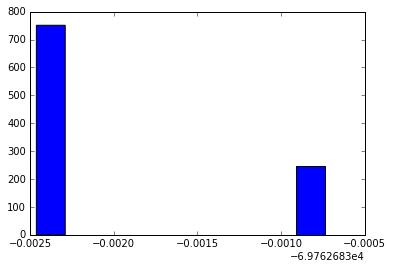

In [7]:
plt.hist(logp_samples)
plt.show()